In [46]:
from datasets import load_dataset
import numpy as np
from matplotlib import pyplot as plt

# Downloading mnist dataset from Hugging Face

In [47]:
data = load_dataset("mnist")
data_train = load_dataset("mnist", split="train[:60000]")

In [48]:
#Extracting 1000 images from dataset downloaded
data = []
count = [0]*10
for image,label in zip(data_train['image'],data_train['label']):
  if count[label] < 100:
    data.append(image)
    count[label] = count[label] + 1

In [49]:
#Converting images to list and Flattening the list
for i in range(len(data)):
  data[i] = np.array(data[i])
  data[i] = data[i].flatten()

# i. PCA Algorithm

### Step 1: - Centering the dataset

In [50]:
n = 1000 # No. of Data points
d = 784  # Dimension of data point
mean = np.zeros((d))
for i in range(d):
    temp = 0.0
    for j in range(n):
        temp += data[j][i]
    mean[i] = temp/n
centered_data = np.zeros((n,d))
for i in range(n):
    for j in range(d):
        centered_data[i][j] = data[i][j] - mean[j]

### Step 2 :- Calculating the Covariance matrix

In [51]:
C = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        for k in range(n):
            C[i][j] += (centered_data[k][i]*centered_data[k][j])
        C[i][j] = C[i][j]/n
# Alternate way to calculate covariance matrix 
# C = np.cov(centered_data.T)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Step 3 :- Calculating the Principal Component by Eigenvalues and Eigenvectors

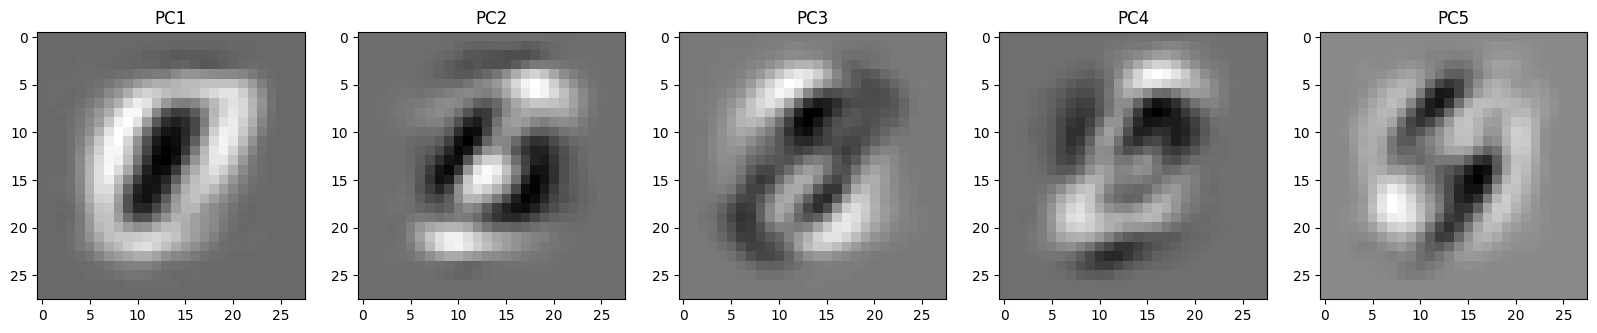

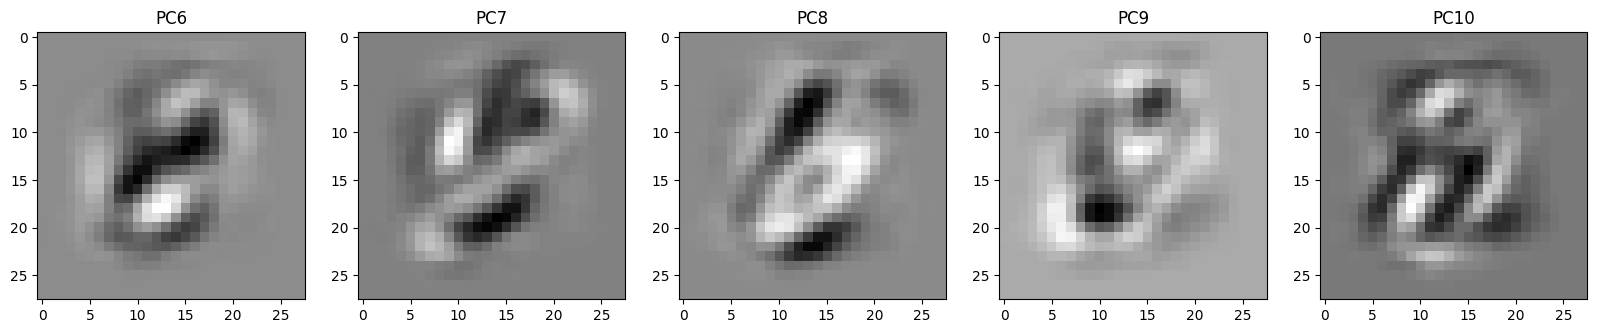

In [52]:
eigenvalue,eigenvector = np.linalg.eigh(C)
eigenvector = np.flip(eigenvector)
eigenvalue = np.flip(eigenvalue)
# First 10 principal components
fig,(img1,img2,img3,img4,img5) = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
fig,(img6,img7,img8,img9,img10) = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
for i in range(10):
    if i==0:
        img1.title.set_text(f"PC{i+1}")
        img1.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==1:
        img2.title.set_text(f"PC{i+1}")
        img2.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==2:
        img3.title.set_text(f"PC{i+1}")
        img3.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==3:
        img4.title.set_text(f"PC{i+1}")
        img4.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==4:
        img5.title.set_text(f"PC{i+1}")
        img5.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==5:
        img6.title.set_text(f"PC{i+1}")
        img6.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==6:
        img7.title.set_text(f"PC{i+1}")
        img7.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==7:
        img8.title.set_text(f"PC{i+1}")
        img8.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==8:
        img9.title.set_text(f"PC{i+1}")
        img9.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')
    elif i==9:
        img10.title.set_text(f"PC{i+1}")
        img10.imshow(eigenvector[:,i].reshape(28,28),cmap='grey')

### Variance in the data set explained by each principal component

In [53]:
sum_eigenvalue = 0
for i in range(d):
    if eigenvalue[i] < 0:
        eigenvalue[i] = 0.0
    sum_eigenvalue += eigenvalue[i]
variance = np.zeros((d))
for i in range(d):
    variance[i] = eigenvalue[i]/sum_eigenvalue
print(variance)

[9.68658170e-02 7.43790038e-02 6.92429787e-02 5.43625495e-02
 4.88086687e-02 4.56733529e-02 3.49209319e-02 3.03156851e-02
 2.80030978e-02 2.15213188e-02 2.03136382e-02 1.90583138e-02
 1.82636939e-02 1.71574175e-02 1.63603771e-02 1.51006367e-02
 1.29900398e-02 1.27080852e-02 1.24193643e-02 1.16298918e-02
 1.07842844e-02 1.01026596e-02 9.64027051e-03 9.47815326e-03
 8.99682855e-03 8.53794914e-03 7.94955766e-03 7.66271319e-03
 7.23378362e-03 6.86732006e-03 6.81816741e-03 6.44107775e-03
 6.34615323e-03 5.82394344e-03 5.49033665e-03 5.31237128e-03
 5.15853215e-03 5.10996463e-03 4.76860534e-03 4.69870571e-03
 4.39947442e-03 4.33637542e-03 4.15172487e-03 3.94717524e-03
 3.80790815e-03 3.67690845e-03 3.62186586e-03 3.48002043e-03
 3.41697377e-03 3.24095624e-03 3.09378942e-03 3.02744741e-03
 2.96896416e-03 2.90166959e-03 2.79600134e-03 2.70663422e-03
 2.60484071e-03 2.54291132e-03 2.42044513e-03 2.39842649e-03
 2.29864055e-03 2.28257960e-03 2.11811636e-03 2.09016759e-03
 2.05592076e-03 2.035235

###  ii. dimension k that can be used for a downstream task

130


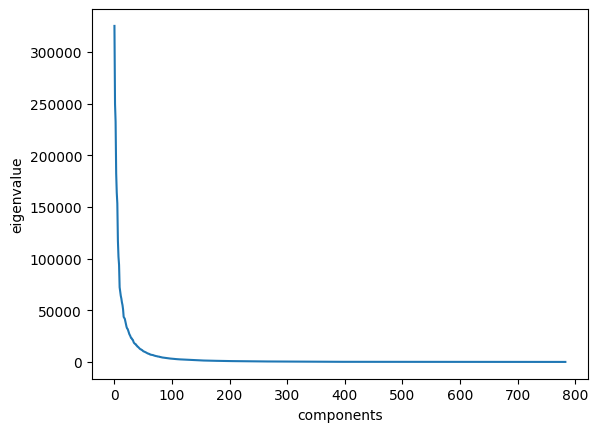

In [54]:
k = 0
temp = 0
for i in range(d):
    temp += eigenvalue[i]
    k += 1
    if temp/sum_eigenvalue >= 0.95:
        break
print(k)
# top k eigenvectors
w = np.zeros((k,d))
for i in range(k):
    w[i] = eigenvector[:,i]
plt.plot(eigenvalue)
plt.xlabel('components')
plt.ylabel('eigenvalue')
plt.show()

### Reconstructing the dataset with different dimensional representations

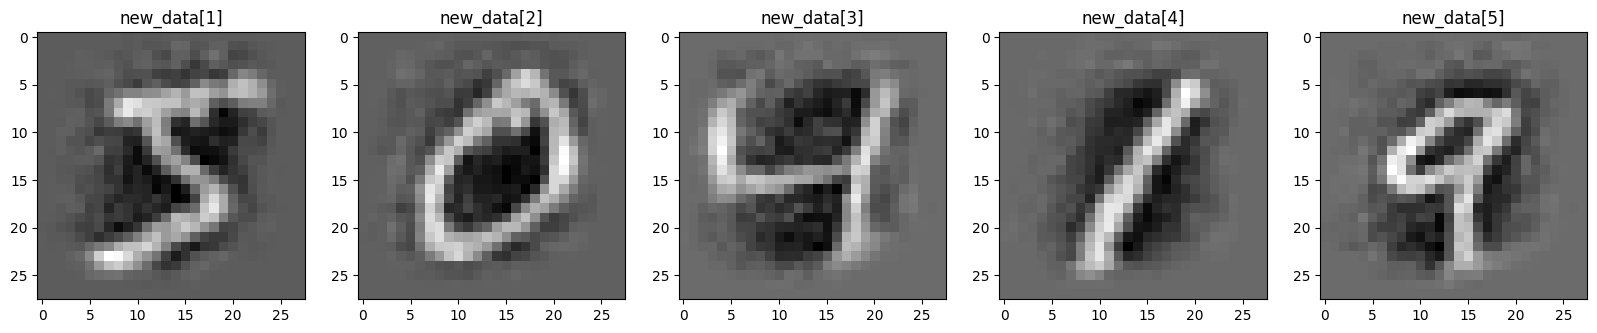

In [55]:
new_data = np.zeros((n,d))
for i in range(n):
    for j in range(k):
        coeff = 0.0
        for l in range(d):
            coeff += centered_data[i][l]*w[j][l]
        new_data[i] += coeff * w[j]
fig,(img1,img2,img3,img4,img5) = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
for i in range(5):
    if i==0:
        img1.title.set_text(f"new_data[{i+1}]")
        img1.imshow(new_data[i].reshape(28,28),cmap='grey')
    elif i==1:
        img2.title.set_text(f"new_data[{i+1}]")
        img2.imshow(new_data[i].reshape(28,28),cmap='grey')
    elif i==2:
        img3.title.set_text(f"new_data[{i+1}]")
        img3.imshow(new_data[i].reshape(28,28),cmap='grey')
    elif i==3:
        img4.title.set_text(f"new_data[{i+1}]")
        img4.imshow(new_data[i].reshape(28,28),cmap='grey')
    elif i==4:
        img5.title.set_text(f"new_data[{i+1}]")
        img5.imshow(new_data[i].reshape(28,28),cmap='grey')

# iii. Kernel PCA

In [56]:
def polynomial_kernel(x,y,d):
    return int(1+np.dot(x.T,y))**d

def gaussian_kernel(x,y,sigma):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))

def kernel_matrix(X, kernel_func, **kwargs):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_func(X[i], X[j], **kwargs)
    return K

### Step 1 :- Computing the Kernel matrix

In [57]:
K_poly_2 = kernel_matrix(centered_data,polynomial_kernel, d=2)
K_poly_3 = kernel_matrix(centered_data,polynomial_kernel, d=3)
K_poly_4 = kernel_matrix(centered_data,polynomial_kernel, d=4)
K_gaussian_1000 = kernel_matrix(centered_data,gaussian_kernel, sigma=1000)
K_gaussian_10000 = kernel_matrix(centered_data,gaussian_kernel, sigma=10000)
K_gaussian_100000 = kernel_matrix(centered_data,gaussian_kernel, sigma=100000)

### Step 2 :- Center the kernel 

In [58]:
def center_kernel(K):
    n_samples = K.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(one_n, np.dot(K, one_n))
    return K_centered

K_poly_centered_2 = center_kernel(K_poly_2)
K_poly_centered_3 = center_kernel(K_poly_3)
K_poly_centered_4 = center_kernel(K_poly_4)
K_gaussian_centered_1000 = center_kernel(K_gaussian_1000)
K_gaussian_centered_10000 = center_kernel(K_gaussian_10000)
K_gaussian_centered_100000 = center_kernel(K_gaussian_100000)

### Step 3 :- Eigendecomposition of Kernel

In [59]:
import math
l_poly_2,beta_poly_2 = np.linalg.eig(K_poly_centered_2)
l_poly_3,beta_poly_3 = np.linalg.eig(K_poly_centered_3)
l_poly_4,beta_poly_4 = np.linalg.eig(K_poly_centered_4)
l_gaussian_1000,beta_gaussian_1000 = np.linalg.eig(K_gaussian_centered_1000)
l_gaussian_10000,beta_gaussian_10000 = np.linalg.eig(K_gaussian_centered_10000)
l_gaussian_100000,beta_gaussian_100000 = np.linalg.eig(K_gaussian_centered_100000)
alpha_poly_2 = np.zeros((n,n))
alpha_poly_3 = np.zeros((n,n))
alpha_poly_4 = np.zeros((n,n))
alpha_gaussian_1000 = np.zeros((n,n))
alpha_gaussian_10000 = np.zeros((n,n))
alpha_gaussian_100000 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        alpha_poly_2[j][i] = beta_poly_2[j][i]/math.sqrt(n*abs(l_poly_2[i]))
        alpha_poly_3[j][i] = beta_poly_3[j][i]/math.sqrt(n*abs(l_poly_3[i]))
        alpha_poly_4[j][i] = beta_poly_4[j][i]/math.sqrt(n*abs(l_poly_4[i]))
        alpha_gaussian_1000[j][i] = beta_gaussian_1000[j][i]/math.sqrt(n*abs(l_gaussian_1000[i]))
        alpha_gaussian_10000[j][i] = beta_gaussian_10000[j][i]/math.sqrt(n*abs(l_gaussian_10000[i]))
        alpha_gaussian_100000[j][i] = beta_gaussian_100000[j][i]/math.sqrt(n*abs(l_gaussian_100000[i]))

### Step 4 :- Projection of each point in the dataset onto the top-2 components

### A. Polynomial kernel

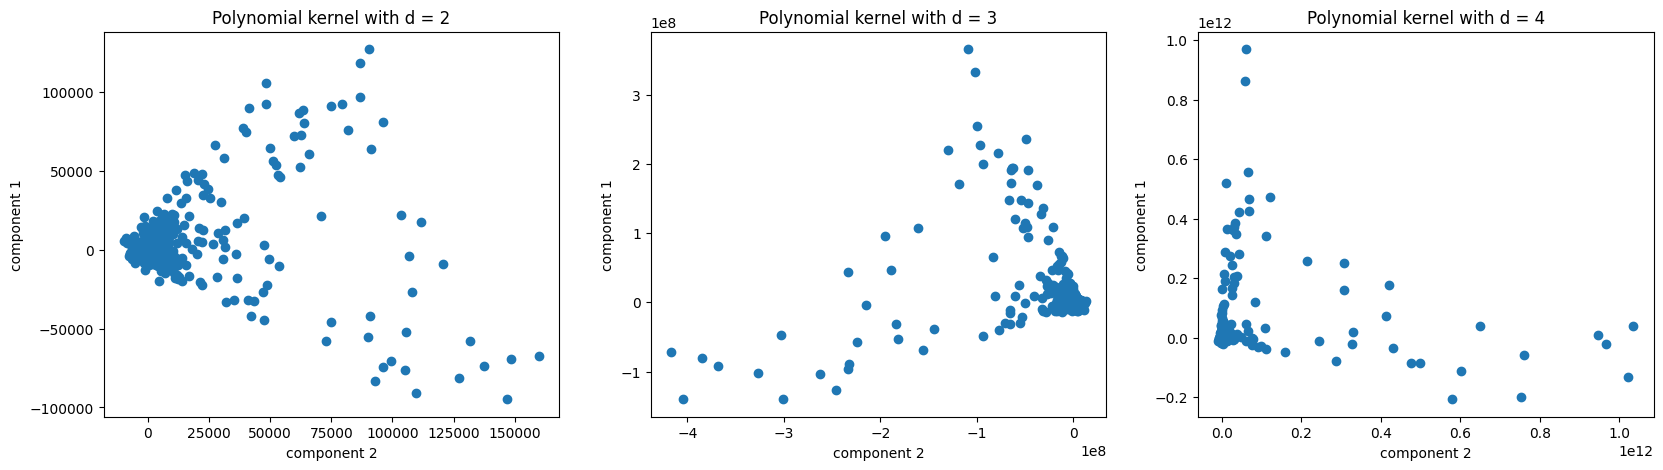

In [60]:
fig,(img1,img2,img3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5)) # for polynomial
for l in range(3):
    if l==0:
        proj_comp_1 = np.zeros((n))
        proj_comp_2 = np.zeros((n))
        for i in range(n):
           for j in range(n):
              proj_comp_1[i] += alpha_poly_2[:,0][j]*polynomial_kernel(centered_data[i],centered_data[j],d=2)
              proj_comp_2[i] += alpha_poly_2[:,1][j]*polynomial_kernel(centered_data[i],centered_data[j],d=2)
        img1.scatter(proj_comp_1,proj_comp_2)
        img1.title.set_text(f"Polynomial kernel with d = {2}")
        img1.set_xlabel("component 2")
        img1.set_ylabel("component 1")
    elif l==1:
        proj_comp_1 = np.zeros((n))
        proj_comp_2 = np.zeros((n))
        for i in range(n):
           for j in range(n):
              proj_comp_1[i] += alpha_poly_3[:,0][j]*polynomial_kernel(centered_data[i],centered_data[j],d=3)
              proj_comp_2[i] += alpha_poly_3[:,1][j]*polynomial_kernel(centered_data[i],centered_data[j],d=3)
        img2.scatter(proj_comp_1,proj_comp_2)
        img2.title.set_text(f"Polynomial kernel with d = {3}")
        img2.set_xlabel("component 2")
        img2.set_ylabel("component 1")
    elif l==2:
        proj_comp_1 = np.zeros((n))
        proj_comp_2 = np.zeros((n))
        for i in range(n):
           for j in range(n):
              proj_comp_1[i] += alpha_poly_4[:,0][j]*polynomial_kernel(centered_data[i],centered_data[j],d=4)
              proj_comp_2[i] += alpha_poly_4[:,1][j]*polynomial_kernel(centered_data[i],centered_data[j],d=4)
        img3.scatter(proj_comp_1,proj_comp_2)
        img3.title.set_text(f"Polynomial kernel with d = {4}")
        img3.set_xlabel("component 2")
        img3.set_ylabel("component 1")

### B. Gaussian kernel

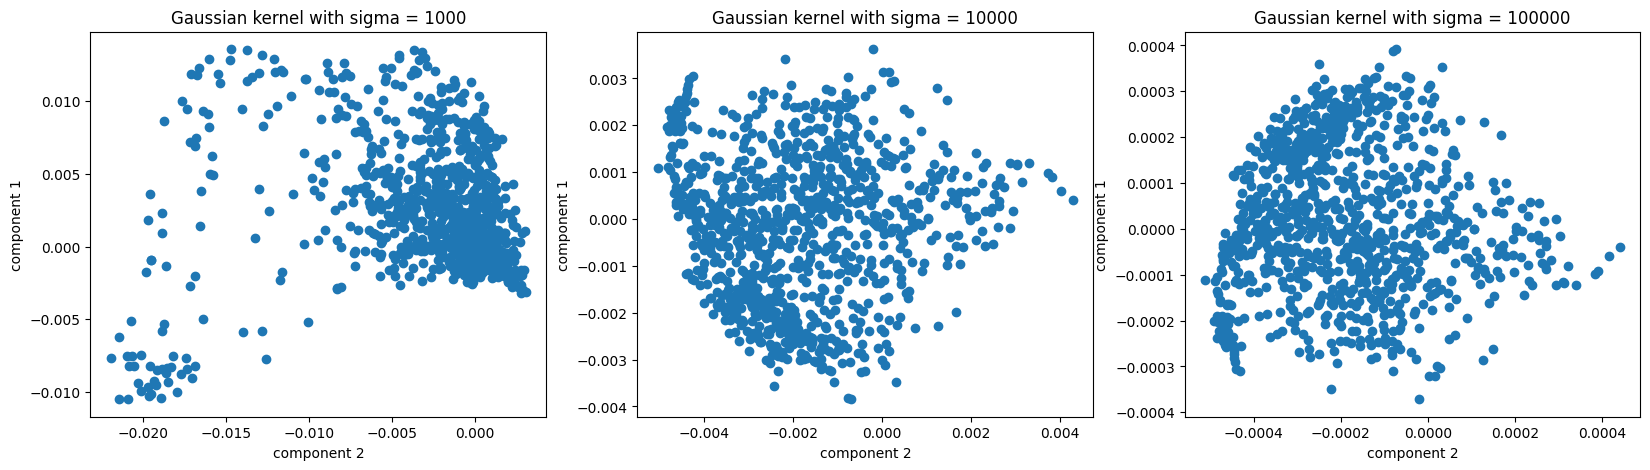

In [61]:
fig,(img1,img2,img3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5)) # for gaussian
for l in range(3):
    if l==0:
        proj_comp_1 = np.zeros((n))
        proj_comp_2 = np.zeros((n))
        for i in range(n):
           for j in range(n):
              proj_comp_1[i] += alpha_gaussian_1000[:,0][j]*gaussian_kernel(centered_data[i],centered_data[j],sigma=1000)
              proj_comp_2[i] += alpha_gaussian_1000[:,1][j]*gaussian_kernel(centered_data[i],centered_data[j],sigma=1000)
        img1.scatter(proj_comp_1,proj_comp_2)
        img1.title.set_text(f"Gaussian kernel with sigma = {1000}")
        img1.set_xlabel("component 2")
        img1.set_ylabel("component 1")
    elif l==1:
        proj_comp_1 = np.zeros((n))
        proj_comp_2 = np.zeros((n))
        for i in range(n):
           for j in range(n):
              proj_comp_1[i] += alpha_gaussian_10000[:,0][j]*gaussian_kernel(centered_data[i],centered_data[j],sigma=10000)
              proj_comp_2[i] += alpha_gaussian_10000[:,1][j]*gaussian_kernel(centered_data[i],centered_data[j],sigma=10000)
        img2.scatter(proj_comp_1,proj_comp_2)
        img2.title.set_text(f"Gaussian kernel with sigma = {10000}")
        img2.set_xlabel("component 2")
        img2.set_ylabel("component 1")
    elif l==2:
        proj_comp_1 = np.zeros((n))
        proj_comp_2 = np.zeros((n))
        for i in range(n):
           for j in range(n):
              proj_comp_1[i] += alpha_gaussian_100000[:,0][j]*gaussian_kernel(centered_data[i],centered_data[j],sigma=100000)
              proj_comp_2[i] += alpha_gaussian_100000[:,1][j]*gaussian_kernel(centered_data[i],centered_data[j],sigma=100000)
        img3.scatter(proj_comp_1,proj_comp_2)
        img3.title.set_text(f"Gaussian kernel with sigma = {100000}")
        img3.set_xlabel("component 2")
        img3.set_ylabel("component 1")